# Question 5

Assume you take have a stick of length 1 and you break it uniformly at random into three parts. What is the probability that the three parts form a triangle?

This problem can be decomposed into two parts as: 

1) Determining the distribution of the sizes of each part of the broken stick,

2) Computing the probability that these parts can form a triangle.

## Distribution of stick sizes

A stick breaking process can be mathematically expressed in several different ways where each formulation provides a slightly different interpretation of the underlying randomness associated with the process.

### Method 1:

It is straightforward to produce $N$ sticks with uniformly random sizes from a single stick of length $1$ by sampling $N-1$ uniform random variables in $(0,1)$. The final stick size is fully determined given $N-1$ stick lengths $\{ L_i \}_{i=1}^{N-1}$ since the problem has $N-1$ degrees of freedom, i.e. $L_N = 1 - \sum_{i=1}^{N-1} L_i$.

Each uniform random variable in $\{ U_i \}_{i=1}^{N-1}$ represents a breaking point for the original stick $(0,1)$. 

Then add the boundary points $U_0 = 0$ and $U_N = 1$ to the set of breaking points as

\begin{align*}
    \{ U_i \}_{i=0}^{N} = \{ 0, 1 \} \cup \{ U_i \}_{i=1}^{N-1}
\end{align*}

A sorted version of this sequence can be denoted by changing the index as $\{ \bar{U}_j \}_{j=1}^{N+1}$ such that $\bar{U}_1 \leq \bar{U}_2 \leq \cdots \leq \bar{U}_{N+1}$ where $\bar{U}_1 = 0$ and $\bar{U}_{N+1} = 1$.

Then the stick lengths can be found as

\begin{align*}
    \{ L_k \}_{k=1}^{N} = \bar{U}_{k+1} - \bar{U}_{k}
\end{align*}

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n_parts = 3
n_samples = 100_000
stick_breaking_points = np.random.uniform(low=0., high=1., size=(n_samples,(n_parts-1)))
stick_breaking_points = np.concatenate((np.concatenate((np.zeros((n_samples,1)), np.sort(stick_breaking_points, axis=1)), axis=1), np.ones((n_samples, 1))), axis=1)

In [3]:
size_samples = []
for i in range(2, n_parts+2):
    size_samples.append(np.diff(stick_breaking_points[:,(i-2):i]))
size_samples = np.array(size_samples)

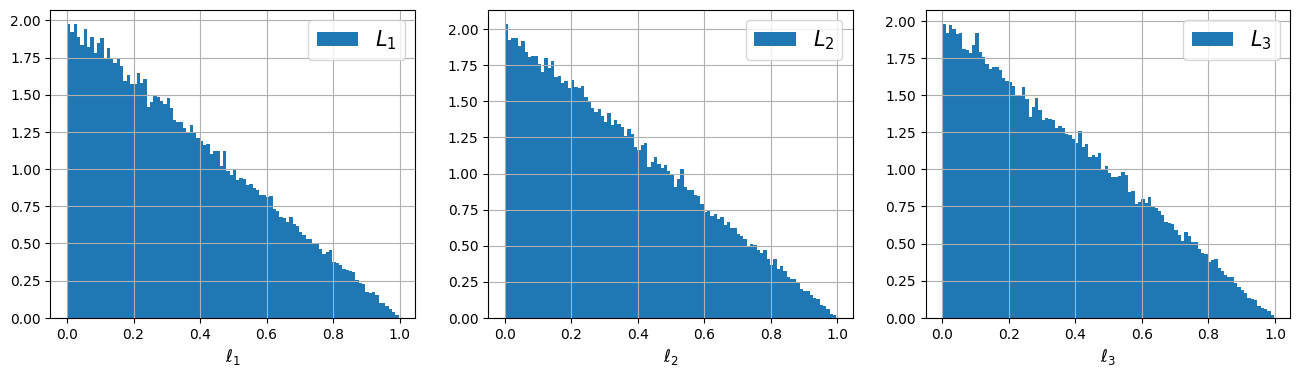

In [4]:
fig, ax = plt.subplots(ncols=n_parts, figsize=(16,4))
for i in range(n_parts):
    ax[i].hist(size_samples[i,:,0], bins=100, density=True, label=r'$L_{'+f'{i+1}'+r'}$')
    ax[i].grid(True)
    ax[i].legend(fontsize=15)
    ax[i].set_xlabel(r'$\ell_{'+f'{i+1}'+r'}$', fontsize=12)
plt.show()

### Method 2:
 
While method 1 is simple to implement, it is difficult to analyse since it involves a sorting operation. 

A sequential approach to generating stick lengths can be formulated as first randomly breaking a stick into two, then choosing one of the parts with a probability proportionaly to their lengths and randomly breaking it into two again.

Let $U_1 \sim \mathcal{U}((0,1))$ be a uniform distribution $\text{Unif}((0,1))$ such that the intermediate lengths of the two sticks are

\begin{align*}
    I_1 &= U_1 \\ 
    I_2 &= (1-U_1)
\end{align*}

Then randomly choose one of the intermediate sticks with a probability proportional to their lengths $I_1$ and $I_2$.

Let $C \sim \mathcal{Be}(p=(1-I_1))$ be a Bernoulli random variable denoting a choice among sticks with lengths $\{ I_1, I_2 \}$ where the probability of choosing the stick $1$ is $I_1$.

Then let $U_2 \sim \mathcal{U}((0,I_{C+1}))$ be a uniform random variable that depends on the value of $C$.

\begin{align*}
    L_1 &= U_2 \\
    L_2 &= I_{C+1} - U_2 \\
    L_3 &= I_{\{ 1, 2 \} \setminus \{ C+1 \} }
\end{align*}

such that $\sum_{i=1}^{3} L_{i} = 1$.

In [5]:
stick = (0, 1)
n_samples = 100_000

lengths = []
for i in range(n_samples):
    X_1 = np.random.uniform(low=stick[0], high=stick[1])

    rnd_idx = np.random.binomial(n=1, p=(stick[1]-X_1))
    C = [(0, X_1), (X_1, 1)][rnd_idx]

    if C == (0, X_1):
        X_2 = np.random.uniform(low=stick[0], high=X_1)
        L_1 = (1-X_1)
        L_2 = X_2
        L_3 = X_1 - X_2

    if C == (X_1, stick[1]):
        X_2 = np.random.uniform(low=X_1, high=stick[1])
        L_1 = X_1
        L_2 = X_2 - X_1
        L_3 = 1 - X_2

    lengths.append([L_1, L_2, L_3])

lengths = np.array(lengths)

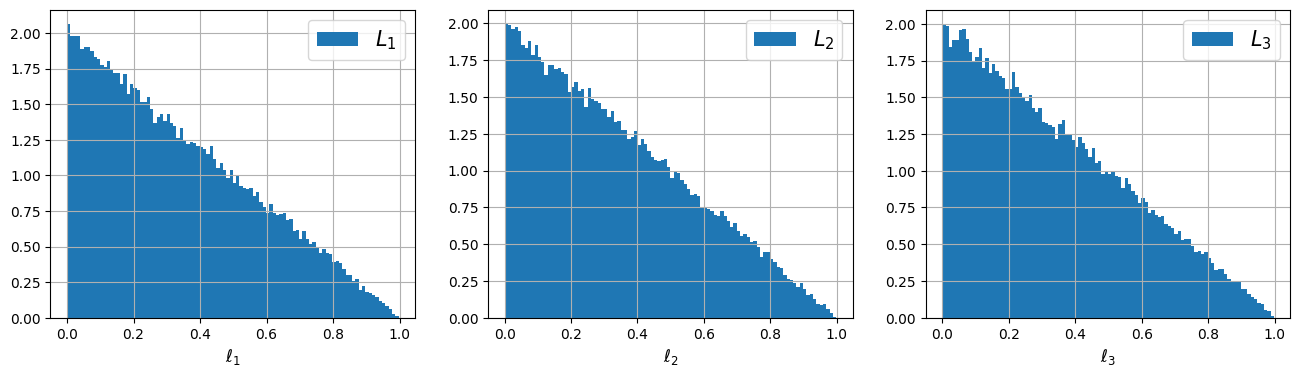

In [6]:
fig, ax = plt.subplots(ncols=3, figsize=(16,4))
for i in range(3):
    ax[i].hist(lengths[:,i], bins=100, density=True, label=r'$L_{'+f'{i+1}'+r'}$')
    ax[i].grid(True)
    ax[i].legend(fontsize=15)
    ax[i].set_xlabel(r'$\ell_{'+f'{i+1}'+r'}$', fontsize=12)
plt.show()

### Method 3

An alternative way to formulate this problem is to model the lengths $L_1$, $L_2$ and $L_3$ of the three sticks directly instead of considering points in $(0,1)$.

Since the stick is broken uniformly at random into three parts, the marginal distributions of the lengths should be identical. However, $L_1$, $L_2$ and $L_3$ are dependent random variables with

\begin{align*}
    \sum_{i=1}^{3} L_i = 1
\end{align*}

The joint distribution of the lengths can be factorised as

\begin{align*}
    p(L_1, L_2, L_3) &= p(L_3|L_1, L_2) p(L_2|L_1) p(L_1) \\
    &= (1 - (L_1 + L_2)) p(L_2|L_1) p(L_1)
\end{align*}

where the third length $L_3$ is fully determined with the knowledge of $L_1$ and $L_2$.

Consider a sequential procedure where a stick is first broken into two parts such that the length of the first part is assigned to $L_1$. Then, the remaining part is broken into two again such that the length of the first part is assigned to $L_2$. Finally, the length of the remaining part is assigned to $L_3$.

The distribution $p(L_1)$ of the first stick length is on $(0,1)$ and should have a mean such that

\begin{align*}
    \int_{0}^{1} L_1 p(L_1) dL_1 = \frac{1}{3}
\end{align*}

This can be modelled as a Beta distribution $\text{Beta}(\alpha, \beta)$ with probability density function

\begin{align*}
    p(X|\alpha, \beta) = \frac{\Gamma(\alpha+\beta)}{\Gamma(\alpha)\Gamma(\beta)} X^{(\alpha-1)} (1-X)^{\beta-1}, \quad \quad \alpha, \beta > 0
\end{align*}

with mean 

\begin{align*}
    \mathbb{E}[X] = \frac{\alpha}{\alpha + \beta}
\end{align*}

The parameter $\alpha$ can be interpreted as the relative length of the first part of the original stick and $\beta$ as the remaining length. Hence setting $\alpha=1$ and $\beta=2$ we get the desired mean value. Then,

\begin{align*}
    p(X) &= \frac{\Gamma(3)}{\Gamma(1)\Gamma(2)} (1-X) \\
    &= 2 (1-X)
\end{align*}

Details:

\begin{align*}
    \frac{1}{3} &= \int_{0}^{1} X 2 (1-X) dX \\
    &= 2 \int_{0}^{1} (X-X^2) dL_1 \\
    &= 2 \left( \int_{0}^{1} X dX - \int_{0}^{1} X^2 dX \right) \\
    &= 2 \left( \frac{X^2}{2} - \frac{X^3}{3} \right) \\
    &= 2 \left( \frac{1}{2} - \frac{1}{3} \right) \\
    &= \frac{1}{3}
\end{align*}

Then set $p(L_1) = p(X)$.

The conditional distribution of the length $L_2$ of the second stick should be proportional to another Beta distribution with $\alpha^\prime = 1$ and $\beta^\prime = 1$ since there will be a third part. However, we already broke of a part of the stick with length $L_1$, the conditional distribution should be scaled by $(1-L_1)$. Then $Y \sim p(Y) = \text{Beta}(1,1)$ and

\begin{align*}
    L_2 = (1-L_1) Y
\end{align*}

and finally, 

\begin{align*}
    L_3 = 1 - (L_1+L_2)
\end{align*}

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [13]:
n_parts = 3
n_samples = 100_000

L1s = np.random.beta(a=1, b=(n_parts-1), size=(n_samples, 1))
L2s = np.random.beta(a=1, b=n_parts-2, size=(n_samples, 1)) * (1-L1s)
L3s = 1 - (L1s + L2s)

In [14]:
lengths = np.concatenate((L1s, L2s), axis=1)
lengths = np.concatenate((lengths, L3s), axis=1)

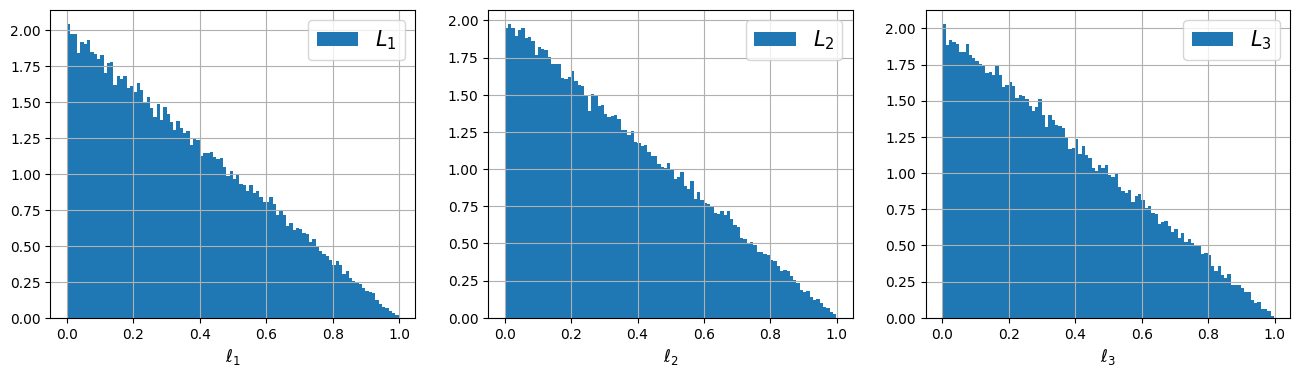

In [15]:
fig, ax = plt.subplots(ncols=3, figsize=(16,4))
for i in range(3):
    ax[i].hist(lengths[:,i], bins=100, density=True, label=r'$L_{'+f'{i+1}'+r'}$')
    ax[i].grid(True)
    ax[i].legend(fontsize=15)
    ax[i].set_xlabel(r'$\ell_{'+f'{i+1}'+r'}$', fontsize=12)
plt.show()

### Method 4

Use a Dirichlet distribution.

In [11]:
lengths = np.random.dirichlet(alpha=[1, 1, 1], size=100_000)

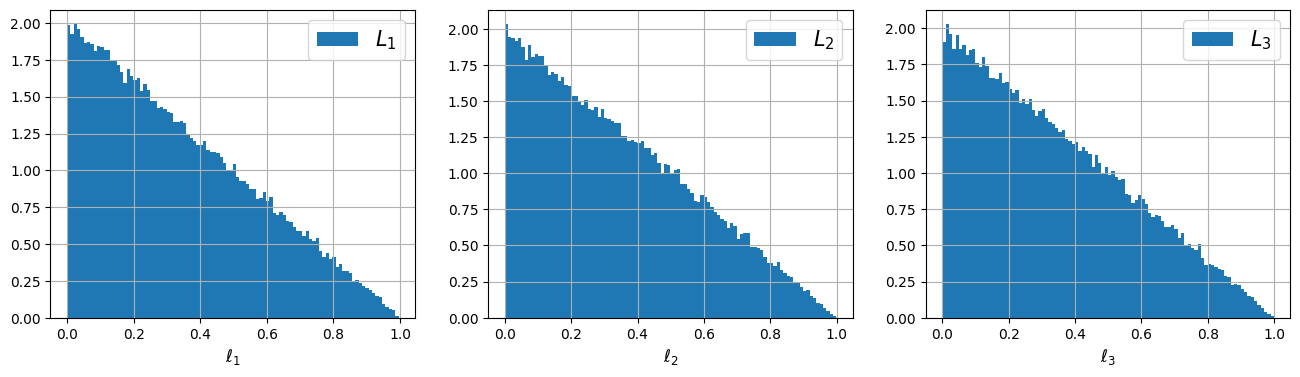

In [12]:
fig, ax = plt.subplots(ncols=3, figsize=(16,4))
for i in range(3):
    ax[i].hist(lengths[:,i], bins=100, density=True, label=r'$L_{'+f'{i+1}'+r'}$')
    ax[i].grid(True)
    ax[i].legend(fontsize=15)
    ax[i].set_xlabel(r'$\ell_{'+f'{i+1}'+r'}$', fontsize=12)
plt.show()

## Simulation based inference

In [16]:
def test_triangle(lengths):
    a = lengths[0]
    b = lengths[1]
    c = lengths[2]
    if (np.abs(a - b) < c) and (c < a+b):
        return 1
    else:
        return 0

In [17]:
is_triangle = []

for i in range(lengths.shape[0]):
    is_triangle.append(test_triangle(lengths[i]))

is_triangle = np.array(is_triangle)

is_triangle.sum() / lengths.shape[0]

np.float64(0.24935)